# Problem 5, Ch. 7

Python can help you solve the problems in your text book. In this notebook I will use *Python* code to plot and curve fit the Arrhenius equation to the data given in problem 5 of chapter 7. I will leave it to yopu to interpret the magnitude of the values of $E_a$ and the pre-exponetial value, $A$.

<img src="p5.png" width=800 class=center />


## The Arrhenius Equation

This is one of the most famous equations of physical chemistry. You first saw it in your first year of chemistry and here it come around again. Everything that you learned previously is needed as you move forward. Embrace the past, it defines your future. Yes, you are shackled to the past, no matter what the poets say.

The Arrhenenius equation relates rate to temperature by defining an activation energy for the reaction and a pre-exponential factor that incorporates a lot of ideas, including the change in entropy to reach the transition state.

$$ k_{obs} = A \cdot {\rm e}^{\frac{-E_a}{RT}}$$

We can create a linear form of the equation by applying the $\ln$ function

$$ \ln{\left( k_{obs} \right)} = \ln{A} - {\frac{E_a}{R} \cdot \frac{1}{T}}$$

So if we plot $\ln{\left( k_{obs} \right)}$ vs $\frac{1}{T}$ we should getn a straight line withn a slope of $\frac{E_a}{R}$ and a y-intercept of \ln{A}.

## The Data

I will use the *Python* code below to create a dataframe for the data listed in the textbook. In the data matrix that I create I will list paired values of temperature and observed rate constant. Then I will convert the array to a dataframe using the *Pandas* dataframe function.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#!pip install uncertainties           # uncomment to install uncertaities package in Colab

import uncertainties as un
from uncertainties import unumpy as unp    ## Tools that will replace NumPy and Math 
from uncertainties import umath            ##  commands with versions that use Uncertianties  
                                           ##  as well as normal values.


path = "https://raw.githubusercontent.com/blinkletter/StealThisBook/main/6_PhysOrgExamples/"
path = "../6_PhysOrgExamples/"



data = [[592, 522],   # Temp (K), rate constant ( M^-1 s^-1)
        [603, 755],
        [627, 1700],
        [652, 4030]]

### use this data set and see if the error improves with more points
#data = [[592, 522],   # Temp (K), rate constant ( M^-1 s^-1)
#        [603, 755],
#        [627, 1700],
#        [652, 4030],
#        [594, 560],   # Temp (K), rate constant ( M^-1 s^-1)
#        [610, 1000],
#        [637, 2500],
#        [642, 3000]]


df=pd.DataFrame(data, columns=["T","k"])
display(df)

,T,k
0,592,522
1,603,755
2,627,1700
3,652,4030


## The Plot

Now we just need to fit the data to a straight line. We could define a linear function and use the `scipy.optimize.curve_fit()` function or we can use the linear regression method with the `scipy.stats.linregress()` function.  Both methods will give exactly the same result but will return statistical scores differently. In this case I will use the `linregress` function.

In the code below I will plot the data, fit the data to a straight line, and plot the result of that fit. I will also report the $R^2$ value and report the parameters (slope and intercept) from the linear regression.

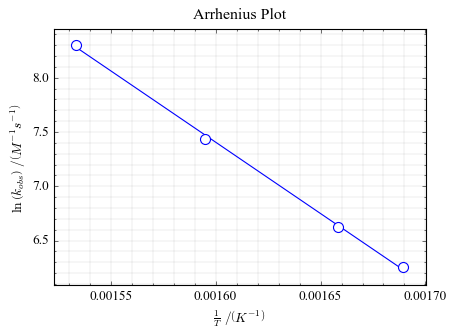



slope = -13147.8+/-297.0
intercept = 28.443+/-0.481
RSQ = 0.999


In [15]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

x = 1/df["T"]
y = np.log(df["k"])


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(path + "S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  
ax.margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept
ax.plot(x, fity, "-")

ax.plot(x, y, "o")  # plotting the data AFTER the line will put the points at the front of the stack of images

############################
### Set labels and scale ###
############################

ax.set(title="Arrhenius Plot",       
          ylabel=r"$\ln{\left( k_{obs} \right)}~/ \left( M^{-1}s^{-1} \right)$", 
          xlabel=r"$\frac{1}{T}~/ \left( K^{-1} \right)$",                
#          xlim=[0,100],                  
#          ylim=[-1,7]
         )

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

### create values using uncertainties for error propagation

slope = un.ufloat(linfit.slope,linfit.stderr)
intercept = un.ufloat(linfit.intercept, linfit.intercept_stderr)

print(f"")
print(f"")                            

### print results

print(f"slope = {slope:0.1f}")
print(f"intercept = {intercept:0.3f}")
print(f"RSQ = {(linfit.rvalue**2):0.3f}")



## Calculating A and $E_a$

We know that the intercept is $\ln{A}$ and the slope is $- {\frac{E_a}{R}}$

The code below will report the values of A and $E_a$.

In [16]:
R = 8.314 # J/mole

#Ea = -linfit.slope * R
Ea = -slope * R

print(f"The activation energy, Ea, is {Ea/1000:0.2f} kJ/mole")

#A_value = np.exp(linfit.intercept)
A_value = unp.exp(intercept)
print(f"The pre-exponential factor, A, is {A_value:0.2e}")

print()

temp_average = np.average(df["T"])
print(f"The average temperature is {temp_average:0.1f}K")



The activation energy, Ea, is 109.31+/-2.47 kJ/mole
The pre-exponential factor, A, is (2.25+/-1.08)e+12

The average temperature is 618.5K


### A Large Error?

When we take the line fit we see a veryt large relative error in the calculated "A-value." The *Uncertainties* package correclt propagated error through the exponential function. The realtive error is about $50\%$. Thats a lot of uncertainty. If we use the resulting values of $A$ and $E_a$ to calculate $k$ at the average temperature ($618\ ^\circ C$), we see that the error in the result is also above $70\%$.  

The error is given as the standard deveation. this measn that if we performed the experiment again we would estimate the odds of getting an answer within the stadrad deviation as $68\%$. The is a one-sigma confidence level. For a two-sigma confidence level ($95\%$ change of a result being in the range) we would use an error of twice the standard deviation; for $99\%$ confidence we would use an error of three standard deviations.



In [17]:
rate618 = A_value * unp.exp(-Ea/(R * temp_average))

print(f"k  at {temp_average:0.1f} C is {rate618:0.0f} M^-1s^-1")



k  at 618.5 C is 1320+/-898 M^-1s^-1


### Throwing a Dart

When we plot the Arrhenius plot starting so that the y-intercept, which defines the A-value, is on the plot, we see that the data points are very far away from the intercept relative to their span. The confidence for the y-intercept is therefor low. We need more points or a larger range in temperature (preferable both) to increase the precision of our line fit when we extend the slope so far away from our data.

The linear regression function in *SciPy* estimated the standard deviation for the calculated intercept to be large because of the distance from the data points. The math tools provided by the *Uncertainties* package propagated the error through the math functions (do you know the rule for handling error in exponents and in logarithmic functions? The *Uncertainties* package will do it for you.)

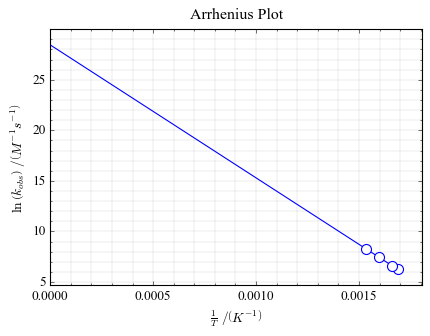

In [18]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

x = 1/df["T"]
y = np.log(df["k"])


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(path + "S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  
ax.margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################

x_fit = np.linspace(0, np.max(x), 10)

linfit = linregress(x,y)
fity = linfit.slope * x_fit + linfit.intercept
ax.plot(x_fit, fity, "-")

ax.plot(x, y, "o")  # plotting the data AFTER the line will put the points at the front of the stack of images

############################
### Set labels and scale ###
############################

ax.set(title="Arrhenius Plot",       
          ylabel=r"$\ln{\left( k_{obs} \right)}~/ \left( M^{-1}s^{-1} \right)$", 
          xlabel=r"$\frac{1}{T}~/ \left( K^{-1} \right)$",                
          xlim=[0,None],                  
          ylim=[None,None]
         )

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots




## Your Turn

We have calculated the values of $E_a$ and $A$ in a Jupyter notebook. The code and the output of the code are present in the same document so you can evaluate the exact methods used to reach any conclusions. 

We have also learned that error analysis is very important. We saw that a 4-point Arrhenius plot was able to produce a precise energy of activation but that the pre-exponential factor (as calculated from the distant y-intercept) was essential meaningless. Rates calculated at given temperatures using the plot above had errors greater than the nominal value at $2\sigma$  .

What does an A value of $2.3 \times 10^{12}$ mean when the temperature is in the temperature range of 620 K? (see page 367 and thereabouts in your textbook)

What does an activation energy of $110 \frac{kJ}{mole}$ mean? Would it be a fast reaction at room temperature or slow? Is the temperature of 620 K necessary?